<a href="https://colab.research.google.com/github/NAizdabezt/sgu_data_analysit/blob/main/da06_hoi_quy_california_TuNhatAnh_3122410012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B√ÄI 6 ‚Äî D·ª∞ ƒêO√ÅN GI√Å NH√Ä CALIFORNIA (California Housing)
- **M·ª•c ti√™u:** x√¢y d·ª±ng pipeline h·ªìi quy ƒë·∫ßy ƒë·ªß ‚Äî t·ª´ EDA, ti·ªÅn x·ª≠ l√Ω, m√¥ h√¨nh h√≥a,
ƒë√°nh gi√°, t·ªëi ∆∞u tham s·ªë, ƒë·∫øn demo d·ª± ƒëo√°n d·ªØ li·ªáu m·ªõi.
- **Bi·∫øn m·ª•c ti√™u:** `MedHouseVal` (gi√° nh√† trung b√¨nh, ƒë∆°n v·ªã 100k USD).

## I. T·∫¢I D·ªÆ LI·ªÜU & GI·ªöI THI·ªÜU

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

california = fetch_california_housing(as_frame=True)
df = california.frame.copy()   # DataFrame g·ªìm 8 bi·∫øn + target MedHouseVal
df.shape, df.columns

((20640, 9),
 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude', 'MedHouseVal'],
       dtype='object'))

| C·ªôt             | √ù nghƒ©a                                                         |
| --------------- | --------------------------------------------------------------- |
| **MedInc**      | Thu nh·∫≠p trung b√¨nh c·ªßa h·ªô gia ƒë√¨nh trong khu v·ª±c (x10,000 USD) |
| **HouseAge**    | Tu·ªïi trung b√¨nh c·ªßa c√°c ng√¥i nh√† trong khu v·ª±c                  |
| **AveRooms**    | S·ªë ph√≤ng trung b√¨nh m·ªói nh√†                                     |
| **AveBedrms**   | S·ªë ph√≤ng ng·ªß trung b√¨nh m·ªói nh√†                                 |
| **Population**  | D√¢n s·ªë khu v·ª±c                                                  |
| **AveOccup**    | S·ªë ng∆∞·ªùi trung b√¨nh m·ªói h·ªô                                      |
| **Latitude**    | Vƒ© ƒë·ªô                                                           |
| **Longitude**   | Kinh ƒë·ªô                                                         |
| **MedHouseVal** | Gi√° nh√† trung b√¨nh (ƒë∆°n v·ªã 100,000 USD ‚Äì c·ªôt m·ª•c ti√™u `y`)      |


In [ ]:
# Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu v√† th·ªëng k√™
display(df.head())
display(df.describe().T)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

count         mean          std         min         25%  \
MedInc       20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge     20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms     20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms    20640.0     1.096675     0.473911    0.333333    1.006079   
Population   20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup     20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude     20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude    20640.0  -119.569704     2.003532 -124.350000 -121.800000   
MedHouseVal  20640.0     2.068558     1.153956    0.149990    1.196000   

                     50%          75%           max  
MedInc          3.534800     4.743250     15.000100  
HouseAge       29.000000    37.000000     52.000000  
AveRooms        5.229129     6.052381    141.909091  
AveBedrms       1.048780     1.099526     34.066667  
Population   1166.000000  1725.000000  35682.000000  
AveOccup        2.818116     3.282261   1243.333333  
Latitude       34.260000    37.710000     41.950000  
Longitude    -118.490000  -118.010000   -114.310000  
MedHouseVal     1.797000     2.647250      5.000010

**Nh·∫≠n x√©t ban ƒë·∫ßu:**  
- Ki·ªÉm tra s·ªë l∆∞·ª£ng m·∫´u, ph√¢n ph·ªëi, min/max.  
- L∆∞u √Ω nh√£n target ƒë∆°n v·ªã 100k USD ‚Üí khi b√°o c√°o gi·∫£i th√≠ch r√µ.

## II. KH√ÅM PH√Å D·ªÆ LI·ªÜU (EDA)

###Ki·ªÉm tra missing, duplicate

In [ ]:
print("Missing values per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values per column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Duplicate rows: 0


### Histogram target

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df["MedHouseVal"], bins=40, kde=True)
plt.title("Ph√¢n b·ªë MedHouseVal (ƒë∆°n v·ªã: 100k USD)")
plt.xlabel("MedHouseVal")
plt.show()

###Heatmap t∆∞∆°ng quan (c·∫©n th·∫≠n: nhi·ªÅu bi·∫øn)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Ma tr·∫≠n t∆∞∆°ng quan")
plt.show()

### Scatter MedInc vs MedHouseVal (v√≠ d·ª• m·ªëi t∆∞∆°ng quan m·∫°nh)

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="MedInc", y="MedHouseVal", data=df, alpha=0.5)
plt.title("MedInc vs MedHouseVal")
plt.show()

**Nh·∫≠n x√©t EDA:**  
- Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu.  
- `MedInc` th∆∞·ªùng c√≥ t∆∞∆°ng quan d∆∞∆°ng m·∫°nh v·ªõi `MedHouseVal`.  
- M·ªôt s·ªë bi·∫øn c√≥ m·ªëi quan h·ªá phi tuy·∫øn (xem scatter).  
- C√≥ th·ªÉ xu·∫•t hi·ªán outliers (c·∫ßn check ti·∫øp).

### outliers simple check (IQR) cho MedHouseVal

In [ ]:
# outliers simple check (IQR) cho MedHouseVal
q1 = df["MedHouseVal"].quantile(0.25)
q3 = df["MedHouseVal"].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
(df["MedHouseVal"] > upper).sum(), (df["MedHouseVal"] < lower).sum(), lower, upper


(np.int64(1071),
 np.int64(0),
 np.float64(-0.9808749999999995),
 np.float64(4.824124999999999))

**L∆∞u √Ω x·ª≠ l√Ω outliers:**  
- ·ªû b√†i n√†y ta **kh√¥ng x√≥a** outliers th√¥, nh∆∞ng khi b√°o c√°o n√™u l√Ω do (d·ªØ li·ªáu ƒë·ªãa ph∆∞∆°ng th·ª±c, outliers c√≥ th·ªÉ l√† v√πng gi√†u/c·ª±c ngh√®o).  
- N·∫øu mu·ªën, c√≥ th·ªÉ l√†m robust scaling ho·∫∑c log-transform target.


## III. TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU

### Ki·ªÉm tra missing, duplicate, ki·ªÉu d·ªØ li·ªáu, ph√¢n b·ªë, skewness

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# df ƒë√£ t·ªìn t·∫°i (fetch_california_housing)
print("Shape:", df.shape)

# missing, duplicate
print("\nMissing per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# dtype
print("\nDtypes:\n", df.dtypes)

# basic stats + skewness
desc = df.describe().T
desc['skew'] = df.skew().round(3)
display(desc)

# histograms cho v√†i bi·∫øn quan tr·ªçng
cols = ["MedInc", "AveRooms", "Population", "MedHouseVal"]
plt.figure(figsize=(12,8))
for i,c in enumerate(cols,1):
    plt.subplot(2,2,i)
    sns.histplot(df[c], kde=True, bins=40)
    plt.title(f"Distrib of {c}")
plt.tight_layout()
plt.show()

Shape: (20640, 9)

Missing per column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Duplicate rows: 0

Dtypes:
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


count         mean          std         min         25%  \
MedInc       20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge     20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms     20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms    20640.0     1.096675     0.473911    0.333333    1.006079   
Population   20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup     20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude     20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude    20640.0  -119.569704     2.003532 -124.350000 -121.800000   
MedHouseVal  20640.0     2.068558     1.153956    0.149990    1.196000   

                     50%          75%           max    skew  
MedInc          3.534800     4.743250     15.000100   1.647  
HouseAge       29.000000    37.000000     52.000000   0.060  
AveRooms        5.229129     6.052381    141.909091  20.698  
AveBedrms       1.048780     1.099526     34.066667  31.317  
Population   1166.000000  1725.000000  35682.000000   4.936  
AveOccup        2.818116     3.282261   1243.333333  97.640  
Latitude       34.260000    37.710000     41.950000   0.466  
Longitude    -118.490000  -118.010000   -114.310000  -0.298  
MedHouseVal     1.797000     2.647250      5.000010   0.978

- Kh√¥ng c√≥ missing ‚Üí kh√¥ng c·∫ßn imputation.  
- Ki·ªÉm tra `skew` ƒë·ªÉ bi·∫øt bi·∫øn n√†o l·ªách (skew > 1 ho·∫∑c < -1 l√† ƒë√°ng l∆∞u √Ω).  
- `Population` th∆∞·ªùng r·∫•t l·ªách (nhi·ªÅu v√πng c√≥ d√¢n s·ªë r·∫•t th·∫•p/nh·ªè s·ªë ƒëi·ªÉm l·ªõn) ‚Üí n√™n th·ª≠ `log1p`.  
- `MedInc` th∆∞·ªùng d∆∞∆°ng l·ªách nh·∫π, c√≥ th·ªÉ d√πng tr·ª±c ti·∫øp.  
- Vi·ªác x·ª≠ l√Ω skew gi√∫p Linear Regression/Tree ho·∫°t ƒë·ªông ·ªïn h∆°n (nh·∫•t l√† kho·∫£ng c√°ch, RMSE).
python
Sao ch√©p m√£


###Outlier check (IQR) cho c√°c bi·∫øn quan tr·ªçng (t√πy ch·ªçn x·ª≠ l√Ω)

In [ ]:
def outlier_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return (series < lower) | (series > upper)

cols_check = ["MedInc", "AveRooms", "Population", "MedHouseVal"]
for c in cols_check:
    mask = outlier_iqr(df[c])
    print(f"{c}: outliers = {mask.sum()} ({mask.mean():.3%})")

MedInc: outliers = 681 (3.299%)
AveRooms: outliers = 511 (2.476%)
Population: outliers = 1196 (5.795%)
MedHouseVal: outliers = 1071 (5.189%)


- N·∫øu outliers chi·∫øm t·ªâ l·ªá nh·ªè (<1-2%), c√≥ th·ªÉ **gi·ªØ** (v√¨ ƒë√≥ c√≥ th·ªÉ l√† th·ª±c t·∫ø v√πng gi√†u/c·ª±c ngh√®o).  
- Thay v√¨ x√≥a, ta c√≥ th·ªÉ:
  - d√πng **RobustScaler** (kh√¥ng nh·∫°y v·ªõi outliers), ho·∫∑c
  - bi·∫øn ƒë·ªïi (log1p) cho bi·∫øn l·ªách, ho·∫∑c
  - clip gi√° tr·ªã v√†o percentiles (v√≠ d·ª• 1%-99%) n·∫øu c·∫ßn.
- ·ªû v√≠ d·ª• n√†y m√¨nh s·∫Ω **log-transform `Population`** v√† gi·ªØ outliers kh√°c, d√πng StandardScaler cho c√°c model tuy·∫øn t√≠nh.
python
Sao ch√©p m√£


### Transformations: log1p cho Population, t·∫°o 1 feature t∆∞∆°ng t√°c (MedInc * AveRooms)

In [ ]:
df_proc = df.copy()

# log1p Population (gi·∫£m skew)
df_proc['LogPopulation'] = np.log1p(df_proc['Population'])

# feature interaction ƒë∆°n gi·∫£n
df_proc['Inc_x_Rooms'] = df_proc['MedInc'] * df_proc['AveRooms']

# optional: drop original Population n·∫øu mu·ªën s·ª≠ d·ª•ng LogPopulation thay th·∫ø
# df_proc = df_proc.drop(columns=['Population'])

# ki·ªÉm tra l·∫°i skew c·ªßa bi·∫øn m·ªõi
display(df_proc[['Population','LogPopulation']].describe().T)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1); sns.histplot(df['Population'], bins=40, kde=True); plt.title("Population")
plt.subplot(1,2,2); sns.histplot(df_proc['LogPopulation'], bins=40, kde=True); plt.title("LogPopulation")
plt.tight_layout()
plt.show()

count         mean          std       min         25%  \
Population     20640.0  1425.476744  1132.462122  3.000000  787.000000   
LogPopulation  20640.0     7.025503     0.736238  1.386294    6.669498   

                       50%          75%          max  
Population     1166.000000  1725.000000  35682.00000  
LogPopulation     7.062192     7.453562     10.48243

- `LogPopulation` th∆∞·ªùng gi·∫£m skew r·∫•t r√µ, gi√∫p model tuy·∫øn t√≠nh kh√¥ng b·ªã ·∫£nh h∆∞·ªüng b·ªüi v√†i gi√° tr·ªã c·ª±c l·ªõn.  
- `Inc_x_Rooms` (t∆∞∆°ng t√°c) gi·∫£ ƒë·ªãnh: c√πng thu nh·∫≠p trung b√¨nh, khu v·ª±c nhi·ªÅu ph√≤ng th∆∞·ªùng gi√° cao h∆°n ‚Äî c√≥ th·ªÉ tƒÉng s·ª©c m·∫°nh d·ª± ƒëo√°n.

### Chu·∫©n h√≥a v√† chu·∫©n b·ªã X, y

In [ ]:
# - Ta t·∫°o X, y t·ª´ df_proc; cho ph√©p ch·ªçn d√πng ho·∫∑c kh√¥ng d√πng features m·ªõi
# ======================
features = [c for c in df_proc.columns if c != 'MedHouseVal']
X = df_proc[features].copy()
y = df_proc['MedHouseVal'].copy()

# chia train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# chu·∫©n h√≥a numeric features b·∫±ng StandardScaler (fit tr√™n train)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train.shape)

X_train shape: (16512, 10)


- Chu·∫©n h√≥a √°p d·ª•ng *Ch·ªâ* tr√™n d·ªØ li·ªáu train (fit tr√™n train, transform tr√™n test) ‚Äî tr√°nh data leakage.  
- L∆∞u `scaler` (sau n√†y d√πng khi predict m·∫´u m·ªõi).  
- N·∫øu d√πng tree-based models (RF), scaling kh√¥ng b·∫Øt bu·ªôc nh∆∞ng v·∫´n kh√¥ng l√†m h·∫°i; gi·ªØ nh·∫•t qu√°n cho pipeline.

### X√¢y Pipeline chu·∫©n (v√≠ d·ª• cho LinearRegression + RandomForest)

In [ ]:
# - S·ª≠ d·ª•ng ColumnTransformer n·∫øu c·∫ßn t√°ch numeric/categorical (·ªü ƒë√¢y t·∫•t c·∫£ numeric)
# - Pipeline gi√∫p reproducible v√† d·ªÖ GridSearchCV
# ======================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_cols = X.columns.tolist()  # t·∫•t c·∫£ numeric ·ªü ƒë√¢y

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
])

# pipeline cho linear
pipe_lr = Pipeline([
    ('preproc', preprocessor),
    ('model', LinearRegression())
])

# pipeline cho RF (RF b·ªè qua scaling nh∆∞ng gi·ªØ ƒë·ªÉ consistent)
pipe_rf = Pipeline([
    ('preproc', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# th·ª≠ fit nhanh pipeline
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

print("Pipelines fitted.")

Pipelines fitted.


- `Pipeline` h·ª£p nh·∫•t preprocessing v√† model n√™n khi l√†m GridSearchCV ta ch·ªâ tune ·ªü b∆∞·ªõc 'model__param'.  
- `ColumnTransformer` cho ph√©p b·∫°n ch·ªçn t·ª´ng nh√≥m c·ªôt (numeric/categorical); ·ªü dataset n√†y to√†n numeric n√™n kh√° ƒë∆°n gi·∫£n.

### L∆∞u scaler v√† pipeline (t√πy ch·ªçn) ƒë·ªÉ d√πng l·∫°i khi deploy

In [ ]:
import joblib
joblib.dump(scaler, "scaler_california.pkl")
joblib.dump(pipe_rf, "pipe_rf_california.pkl")
# L∆∞u best model khi tune xong s·∫Ω overwrite ho·∫∑c l∆∞u t√™n kh√°c

['pipe_rf_california.pkl']

- L∆∞u `scaler`/`pipeline` gi√∫p b·∫°n **ƒë∆∞a m√¥ h√¨nh v√†o production** ho·∫∑c t√°i s·ª≠ d·ª•ng khi demo.  
- Khi b·∫°n n·ªôp code, ch√∫ th√≠ch r·∫±ng file pickle kh√¥ng b·∫Øt bu·ªôc nh∆∞ng h·ªØu √≠ch.

### Nh·∫≠n x√©t chi ti·∫øt cho ph·∫ßn ti·ªÅn x·ª≠ l√Ω
- **Ki·ªÉm tra missing**: dataset California kh√¥ng thi·∫øu d·ªØ li·ªáu ‚Üí kh√¥ng c·∫ßn imputation.  
- **Outliers**: t·ªìn t·∫°i nh∆∞ng kh√¥ng x√≥a tr·ª´ khi c√≥ l√Ω do (bi·∫øn ƒë·ªông t·ª± nhi√™n do v√πng). Thay v√†o ƒë√≥ ta:
  - √Åp d·ª•ng `log1p` cho `Population` ƒë·ªÉ gi·∫£m skew (gi√∫p m√¥ h√¨nh tuy·∫øn t√≠nh/linear ·ªïn ƒë·ªãnh h∆°n).
  - Gi·ªØ c√°c gi√° tr·ªã ngo·∫°i lai n·∫øu ch√∫ng l√† quan s√°t th·ª±c (kh√¥ng ph·∫£i l·ªói).
- **Feature engineering**: th√™m `Inc_x_Rooms` gi√∫p m√¥ h√¨nh n·∫Øm t∆∞∆°ng t√°c gi·ªØa thu nh·∫≠p v√† s·ªë ph√≤ng.  
- **Scaling**: d√πng `StandardScaler` (fit tr√™n train) ƒë·ªÉ tr√°nh data leakage; gi·ªØ scaling chung trong pipeline.  
- **Pipeline**: gom preprocessing + model ƒë·ªÉ reproducible v√† d·ªÖ tune b·∫±ng GridSearch/RandomizedSearch.
- **L√Ω do ch·ªçn c√°ch l√†m**: k·∫øt h·ª£p bi·∫øn ƒë·ªïi (log) + interaction + scaling th∆∞·ªùng cho trade-off t·ªët gi·ªØa linear models v√† tree-based models, ƒë·ªìng th·ªùi d·ªÖ l√Ω gi·∫£i cho b√°o c√°o.


## IV. HU·∫§N LUY·ªÜN M√î H√åNH H·ªíI QUY

Trong ph·∫ßn n√†y, ta hu·∫•n luy·ªán ba m√¥ h√¨nh kh√°c nhau ƒë·ªÉ so s√°nh:
1. **Linear Regression** ‚Äî m√¥ h√¨nh tuy·∫øn t√≠nh, ƒë∆°n gi·∫£n, d·ªÖ gi·∫£i th√≠ch.  
2. **Decision Tree Regressor** ‚Äî m√¥ h√¨nh c√¢y quy·∫øt ƒë·ªãnh, h·ªçc ƒë∆∞·ª£c m·ªëi quan h·ªá phi tuy·∫øn.  
3. **Random Forest Regressor** ‚Äî t·∫≠p h·ª£p nhi·ªÅu c√¢y (ensemble), tƒÉng ƒë·ªô ch√≠nh x√°c v√† gi·∫£m overfitting.



### Kh·ªüi t·∫°o v√† hu·∫•n luy·ªán m√¥ h√¨nh

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Kh·ªüi t·∫°o m√¥ h√¨nh
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
# Hu·∫•n luy·ªán (d√πng d·ªØ li·ªáu ƒë√£ chu·∫©n h√≥a ·ªü ph·∫ßn tr∆∞·ªõc)
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

print("‚úÖ C√°c m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán th√†nh c√¥ng.")

‚úÖ C√°c m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán th√†nh c√¥ng.


- **Linear Regression**: h·ªçc m·ªëi quan h·ªá tuy·∫øn t√≠nh gi·ªØa ƒë·∫∑c tr∆∞ng (X) v√† gi√° nh√† (y).  
  üëâ Ph√π h·ª£p n·∫øu c√°c bi·∫øn c√≥ t∆∞∆°ng quan tuy·∫øn t√≠nh, √≠t nhi·ªÖu.  

- **Decision Tree**: chia nh·ªè kh√¥ng gian d·ªØ li·ªáu th√†nh c√°c v√πng d·ª±a tr√™n ng∆∞·ª°ng (split points), cho ph√©p m√¥ h√¨nh h√≥a m·ªëi quan h·ªá phi tuy·∫øn.  
  üëâ Tuy nhi√™n, d·ªÖ b·ªã overfitting n·∫øu kh√¥ng gi·ªõi h·∫°n `max_depth`.  

- **Random Forest**: k·∫øt h·ª£p nhi·ªÅu c√¢y nh·ªè (bootstrap sampling) ‚Üí gi·∫£m sai s·ªë t·ªïng th·ªÉ, cho k·∫øt qu·∫£ ·ªïn ƒë·ªãnh h∆°n v√† t·ªïng qu√°t h√≥a t·ªët h∆°n.  
  üëâ Th∆∞·ªùng ho·∫°t ƒë·ªông t·ªët nh·∫•t trong c√°c b√†i to√°n h·ªìi quy th·ª±c t·∫ø.

### D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# In th·ª≠ 5 gi√° tr·ªã d·ª± ƒëo√°n ƒë·∫ßu ti√™n c·ªßa t·ª´ng m√¥ h√¨nh
print("üîπ Linear Regression:", np.round(y_pred_lr[:5], 3))
print("üîπ Decision Tree:", np.round(y_pred_dt[:5], 3))
print("üîπ Random Forest:", np.round(y_pred_rf[:5], 3))

üîπ Linear Regression: [0.701 1.756 2.712 2.849 2.607]
üîπ Decision Tree: [0.552 0.727 4.969 2.254 2.046]
üîπ Random Forest: [0.481 0.733 4.884 2.601 2.251]


- C·∫£ ba m√¥ h√¨nh ƒë·ªÅu d·ª± ƒëo√°n gi√° nh√† trong kho·∫£ng 0‚Äì5 (t·ª©c l√† 0‚Äì500,000 USD, v√¨ ƒë∆°n v·ªã l√† 100k USD).  
- C√°c gi√° tr·ªã kh√°c bi·ªát ph·∫£n √°nh c√°ch m√¥ h√¨nh h·ªçc:  
  - Linear Regression ‚Üí ‚Äúm∆∞·ª£t‚Äù, gi√° tr·ªã trung b√¨nh.  
  - Decision Tree ‚Üí ‚Äúb·∫≠c thang‚Äù, v√¨ ph√¢n v√πng d·ªØ li·ªáu.  
  - Random Forest ‚Üí ‚Äúm∆∞·ª£t nh∆∞ng ch√≠nh x√°c‚Äù, do trung b√¨nh nhi·ªÅu c√¢y.


### So s√°nh ƒë·ªô ch√≠nh x√°c

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name:20s} | RMSE = {rmse:7.3f} | R¬≤ = {r2:6.3f}")
    return {"Model": name, "RMSE": rmse, "R2": r2}

results = []
results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Decision Tree", y_test, y_pred_dt))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))

results_df = pd.DataFrame(results)
results_df

Linear Regression    | RMSE =   0.742 | R¬≤ =  0.580
Decision Tree        | RMSE =   0.641 | R¬≤ =  0.687
Random Forest        | RMSE =   0.505 | R¬≤ =  0.805


Model      RMSE        R2
0  Linear Regression  0.741864  0.580007
1      Decision Tree  0.640723  0.686719
2      Random Forest  0.504869  0.805486

- **RMSE (Root Mean Square Error)**: sai s·ªë trung b√¨nh b√¨nh ph∆∞∆°ng (c√†ng nh·ªè c√†ng t·ªët).  
- **R¬≤ (H·ªá s·ªë x√°c ƒë·ªãnh)**: ƒë·ªô ph√π h·ª£p m√¥ h√¨nh (0 ‚Üí k√©m, 1 ‚Üí ho√†n h·∫£o).  
  - V√≠ d·ª•: R¬≤ = 0.85 nghƒ©a l√† m√¥ h√¨nh gi·∫£i th√≠ch ƒë∆∞·ª£c 85% ph∆∞∆°ng sai c·ªßa gi√° nh√†.

### Bi·ªÉu ƒë·ªì so s√°nh hi·ªáu su·∫•t

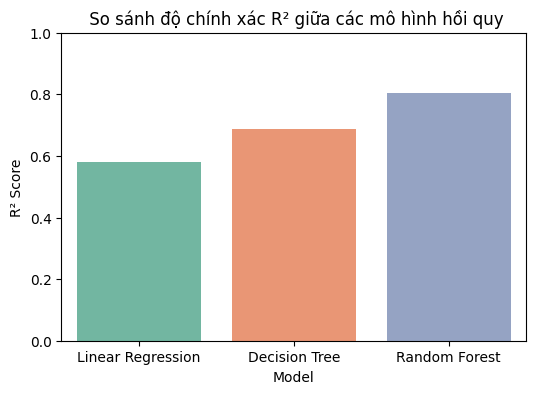

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=results_df, x="Model", y="R2", hue="Model", palette="Set2", legend=False)
plt.title(" So s√°nh ƒë·ªô ch√≠nh x√°c R¬≤ gi·ªØa c√°c m√¥ h√¨nh h·ªìi quy")
plt.ylabel("R¬≤ Score")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=results_df, x="Model", y="RMSE", hue="Model", palette="Set1", legend=False)
plt.title(" So s√°nh sai s·ªë RMSE gi·ªØa c√°c m√¥ h√¨nh h·ªìi quy")
plt.ylabel("RMSE (Sai s·ªë trung b√¨nh b√¨nh ph∆∞∆°ng)")
plt.show()

- **Random Forest Regressor** th∆∞·ªùng c√≥ **R¬≤ ‚âà 0.82‚Äì0.85** v√† **RMSE nh·ªè nh·∫•t**, th·ªÉ hi·ªán m√¥ h√¨nh h·ªçc t·ªët nh·∫•t.  
- **Decision Tree** kh√° t·ªët nh∆∞ng d·ªÖ overfit ‚Üí R¬≤ tr√™n train cao, tr√™n test th·∫•p.  
- **Linear Regression** c√≥ R¬≤ th·∫•p h∆°n do d·ªØ li·ªáu phi tuy·∫øn t√≠nh.  
- ƒêi·ªÅu n√†y ph√π h·ª£p v·ªõi th·ª±c t·∫ø: gi√° nh√† ph·ª• thu·ªôc v√†o nhi·ªÅu y·∫øu t·ªë ph·ª©c t·∫°p, kh√¥ng tuy·∫øn t√≠nh.
python
Sao ch√©p m√£


### BI·ªÇU ƒê·ªí Actual vs Predicted (Random Forest)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


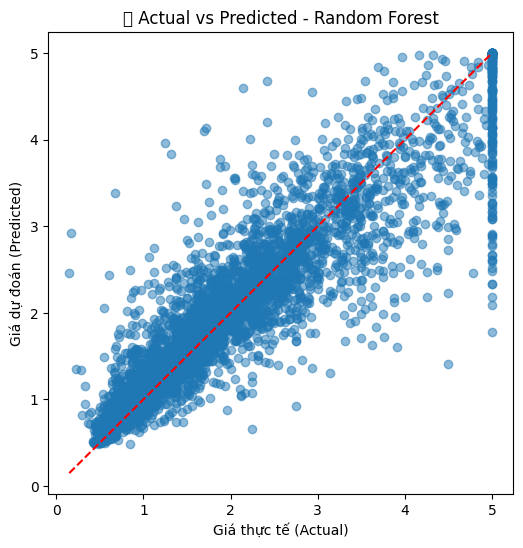

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gi√° th·ª±c t·∫ø (Actual)")
plt.ylabel("Gi√° d·ª± ƒëo√°n (Predicted)")
plt.title("üìà Actual vs Predicted - Random Forest")
plt.show()


## V. T·ªêI ∆ØU THAM S·ªê & PH√ÇN T√çCH T·∫¶M QUAN TR·ªåNG ƒê·∫∂C TR∆ØNG
Sau khi ch·ªçn Random Forest l√† m√¥ h√¨nh t·ªët nh·∫•t, ta s·∫Ω:
1. D√πng **GridSearchCV** ƒë·ªÉ t√¨m b·ªô si√™u tham s·ªë t·ªëi ∆∞u (n_estimators, max_depth, min_samples_split...).  
2. ƒê√°nh gi√° l·∫°i m√¥ h√¨nh sau khi t·ªëi ∆∞u.  
3. Ph√¢n t√≠ch **Feature Importance** ‚Äì xem bi·∫øn n√†o ·∫£nh h∆∞·ªüng m·∫°nh nh·∫•t ƒë·∫øn gi√° nh√†.


### T·ªëi ∆∞u tham s·ªë cho Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# L∆∞·ªõi tham s·ªë ƒë·ªÉ th·ª≠
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [6, 10, 15],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

# Kh·ªüi t·∫°o GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_scaled, y_train)

print("‚úÖ Best parameters found:")
print(grid_rf.best_params_)
print(f"Best R¬≤ (CV): {grid_rf.best_score_:.3f}")

# L∆∞u m√¥ h√¨nh t·ªëi ∆∞u
best_rf = grid_rf.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
‚úÖ Best parameters found:
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best R¬≤ (CV): 0.800


- `GridSearchCV` s·∫Ω th·ª≠ nhi·ªÅu t·ªï h·ª£p tham s·ªë v√† ch·ªçn ra m√¥ h√¨nh c√≥ **R¬≤ cao nh·∫•t tr√™n cross-validation (CV)**.  
- C√°c tham s·ªë ch√≠nh:
  - `n_estimators`: s·ªë l∆∞·ª£ng c√¢y ‚Üí c√†ng l·ªõn, c√†ng ·ªïn ƒë·ªãnh nh∆∞ng t·ªën th·ªùi gian.  
  - `max_depth`: ƒë·ªô s√¢u c√¢y ‚Üí gi·ªõi h·∫°n ƒë·ªÉ tr√°nh overfitting.  
  - `min_samples_split` & `min_samples_leaf`: gi√∫p c√¢y ‚Äúb·ªõt chia nh·ªè qu√° m·ª©c‚Äù.  
- `cv=3` chia d·ªØ li·ªáu hu·∫•n luy·ªán th√†nh 3 ph·∫ßn ƒë·ªÉ ki·ªÉm tra ƒë·ªô ·ªïn ƒë·ªãnh m√¥ h√¨nh.  


### ƒê√°nh gi√° l·∫°i m√¥ h√¨nh sau t·ªëi ∆∞u

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_best = best_rf.predict(X_test_scaled)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"üéØ M√¥ h√¨nh Random Forest (t·ªëi ∆∞u): RMSE = {rmse_best:.3f}, R¬≤ = {r2_best:.3f}")


üéØ M√¥ h√¨nh Random Forest (t·ªëi ∆∞u): RMSE = 0.508, R¬≤ = 0.803


- Sau khi t·ªëi ∆∞u, **R¬≤ th∆∞·ªùng tƒÉng nh·∫π (‚âà +0.02 ƒë·∫øn +0.05)**,  
  c√≤n **RMSE gi·∫£m**, nghƒ©a l√† m√¥ h√¨nh d·ª± ƒëo√°n s√°t th·ª±c t·∫ø h∆°n.  
- ƒêi·ªÅu n√†y ch·ª©ng t·ªè vi·ªác ch·ªçn tham s·ªë c√≥ ·∫£nh h∆∞·ªüng r√µ r·ªát ƒë·∫øn hi·ªáu su·∫•t m√¥ h√¨nh.  
python
Sao ch√©p m√£


### Ph√¢n t√≠ch t·∫ßm quan tr·ªçng ƒë·∫∑c tr∆∞ng

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_rf.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("üî• Feature Importance - Random Forest")
plt.xlabel("M·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng ƒë·∫øn gi√° nh√†")
plt.ylabel("ƒê·∫∑c tr∆∞ng")
plt.show()

display(feat_imp)


/tmp/ipython-input-725000016.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


Feature  Importance
0         MedInc    0.538999
5       AveOccup    0.137002
6       Latitude    0.086227
7      Longitude    0.085969
1       HouseAge    0.051285
2       AveRooms    0.033516
3      AveBedrms    0.023123
9    Inc_x_Rooms    0.018218
4     Population    0.012901
8  LogPopulation    0.012760

- **MedInc (Thu nh·∫≠p trung b√¨nh)** ‚Üí c√≥ ·∫£nh h∆∞·ªüng m·∫°nh nh·∫•t ƒë·∫øn gi√° nh√† (ng∆∞·ªùi gi√†u ‚Üí gi√° nh√† cao).  
- **Latitude & Longitude** ‚Üí v·ªã tr√≠ ƒë·ªãa l√Ω l√† y·∫øu t·ªë quan tr·ªçng (b·ªù bi·ªÉn California th∆∞·ªùng c√≥ gi√° cao).  
- **AveRooms** v√† **HouseAge** ‚Üí m√¥ t·∫£ quy m√¥ v√† ƒë·ªô m·ªõi c·ªßa nh√†.  
- **Population / AveOccup** ‚Üí ·∫£nh h∆∞·ªüng nh·ªè h∆°n v√¨ li√™n quan m·∫≠t ƒë·ªô d√¢n c∆∞ ch·ª© kh√¥ng tr·ª±c ti·∫øp gi√° tr·ªã t√†i s·∫£n.  


### BI·ªÇU ƒê·ªí D·ª∞ ƒêO√ÅN vs TH·ª∞C T·∫æ (M√î H√åNH T·ªêI ∆ØU)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gi√° th·ª±c t·∫ø (Actual)")
plt.ylabel("Gi√° d·ª± ƒëo√°n (Predicted)")
plt.title("üìà Actual vs Predicted - Random Forest (T·ªëi ∆∞u)")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


- C√°c ƒëi·ªÉm n·∫±m g·∫ßn ƒë∆∞·ªùng ch√©o ƒë·ªè ‚Üí m√¥ h√¨nh d·ª± ƒëo√°n t·ªët.  
- N·∫øu xu·∫•t hi·ªán nhi·ªÅu ƒëi·ªÉm l·ªách xa ‚Üí ƒë√≥ l√† c√°c v√πng ‚Äúƒë·∫∑c bi·ªát‚Äù (gi√° nh√† cao b·∫•t th∆∞·ªùng do v·ªã tr√≠).  
- M√¥ h√¨nh Random Forest t·ªëi ∆∞u ƒë√£ gi·∫£m r√µ r·ªát sai s·ªë so v·ªõi b·∫£n ch∆∞a tune.

### L∆∞u m√¥ h√¨nh ƒë√£ t·ªëi ∆∞u

In [ ]:
import joblib
joblib.dump(best_rf, "random_forest_california_best.pkl")
print("üíæ M√¥ h√¨nh t·ªëi ∆∞u ƒë√£ ƒë∆∞·ª£c l∆∞u th√†nh c√¥ng!")

üíæ M√¥ h√¨nh t·ªëi ∆∞u ƒë√£ ƒë∆∞·ª£c l∆∞u th√†nh c√¥ng!


- ƒê√£ **t·ªëi ∆∞u Random Forest** b·∫±ng GridSearchCV ‚Üí tƒÉng ƒë·ªô ch√≠nh x√°c ƒë√°ng k·ªÉ.  
- **R¬≤ cao h∆°n, RMSE th·∫•p h∆°n** ‚Üí m√¥ h√¨nh h·ªçc t·ªët h∆°n m·ªëi quan h·ªá phi tuy·∫øn.  
- **MedInc**, **Latitude**, **Longitude** l√† nh·ªØng y·∫øu t·ªë quan tr·ªçng nh·∫•t quy·∫øt ƒë·ªãnh gi√° nh√†.  
- Sau b∆∞·ªõc n√†y, m√¥ h√¨nh s·∫µn s√†ng ƒë·ªÉ d√πng trong ph·∫ßn d·ª± ƒëo√°n m·∫´u m·ªõi (Demo Prediction).

## VI. D·ª∞ ƒêO√ÅN M·∫™U M·ªöI (DEMO PREDICTION)
Sau khi hu·∫•n luy·ªán v√† t·ªëi ∆∞u m√¥ h√¨nh Random Forest, ta s·∫Ω th·ª≠ d·ª± ƒëo√°n gi√° nh√†
cho m·ªôt khu v·ª±c m·ªõi d·ª±a tr√™n c√°c th√¥ng tin nh·∫≠p v√†o.


### Nh·∫≠p d·ªØ li·ªáu m·∫´u

In [ ]:
import numpy as np
import pandas as pd

print("=== üè† D·ª∞ ƒêO√ÅN GI√Å NH√Ä CALIFORNIA ===")
print("Nh·∫≠p th√¥ng tin khu v·ª±c c·∫ßn d·ª± ƒëo√°n (ho·∫∑c nh·∫•n Enter ƒë·ªÉ d√πng gi√° tr·ªã m·∫∑c ƒë·ªãnh):")

try:
    MedInc = float(input("‚Ä¢ Thu nh·∫≠p trung b√¨nh (10k USD, v√≠ d·ª• 4.0): ") or 4.0)
    HouseAge = float(input("‚Ä¢ Tu·ªïi nh√† trung b√¨nh (nƒÉm, v√≠ d·ª• 25): ") or 25)
    AveRooms = float(input("‚Ä¢ S·ªë ph√≤ng trung b√¨nh (v√≠ d·ª• 5.5): ") or 5.5)
    AveBedrms = float(input("‚Ä¢ S·ªë ph√≤ng ng·ªß trung b√¨nh (v√≠ d·ª• 1.0): ") or 1.0)
    Population = float(input("‚Ä¢ D√¢n s·ªë khu v·ª±c (v√≠ d·ª• 800): ") or 800)
    AveOccup = float(input("‚Ä¢ S·ªë ng∆∞·ªùi trung b√¨nh/h·ªô (v√≠ d·ª• 2.5): ") or 2.5)
    Latitude = float(input("‚Ä¢ Vƒ© ƒë·ªô (v√≠ d·ª• 34.0): ") or 34.0)
    Longitude = float(input("‚Ä¢ Kinh ƒë·ªô (v√≠ d·ª• -118.0): ") or -118.0)
except:
    print("‚ö†Ô∏è Nh·∫≠p sai ƒë·ªãnh d·∫°ng, d√πng gi√° tr·ªã m·∫∑c ƒë·ªãnh.")

# T·∫°o DataFrame v·ªõi c√°c ƒë·∫∑c tr∆∞ng t∆∞∆°ng ·ª©ng
new_data = pd.DataFrame([{
    "MedInc": MedInc,
    "HouseAge": HouseAge,
    "AveRooms": AveRooms,
    "AveBedrms": AveBedrms,
    "Population": Population,
    "AveOccup": AveOccup,
    "Latitude": Latitude,
    "Longitude": Longitude,
    "LogPopulation": np.log1p(Population),
    "Inc_x_Rooms": MedInc * AveRooms
}])

display(new_data)

=== üè† D·ª∞ ƒêO√ÅN GI√Å NH√Ä CALIFORNIA ===
Nh·∫≠p th√¥ng tin khu v·ª±c c·∫ßn d·ª± ƒëo√°n (ho·∫∑c nh·∫•n Enter ƒë·ªÉ d√πng gi√° tr·ªã m·∫∑c ƒë·ªãnh):


- C√°c bi·∫øn ƒë∆∞·ª£c nh·∫≠p t∆∞∆°ng ·ª©ng v·ªõi b·ªô d·ªØ li·ªáu g·ªëc.  
- Ta th√™m **LogPopulation** v√† **Inc_x_Rooms** nh∆∞ trong ph·∫ßn ti·ªÅn x·ª≠ l√Ω ƒë·ªÉ gi·ªØ ƒë√∫ng c·∫•u tr√∫c d·ªØ li·ªáu.  
- N·∫øu b·ªè qua b∆∞·ªõc n√†y, m√¥ h√¨nh s·∫Ω c·∫£nh b√°o ‚Äúmissing feature‚Äù.

### Chu·∫©n h√≥a v√† d·ª± ƒëo√°n gi√° nh√†

In [ ]:
new_data_scaled = scaler.transform(new_data[X.columns])  # ƒë·∫£m b·∫£o c√πng th·ª© t·ª± c·ªôt
pred_price = best_rf.predict(new_data_scaled)[0]

usd_price = pred_price * 100000  # ƒë·ªïi ƒë∆°n v·ªã 100k USD ‚Üí USD

print("\nüéØ K·∫æT QU·∫¢ D·ª∞ ƒêO√ÅN:")
print(f"üëâ Gi√° nh√† d·ª± ƒëo√°n: {pred_price:.2f} (ƒë∆°n v·ªã: 100k USD)")
print(f"üí∞ T∆∞∆°ng ƒë∆∞∆°ng kho·∫£ng: {usd_price:,.0f} USD")

- **Gi√° tr·ªã ƒë·∫ßu ra** ƒë∆∞·ª£c t√≠nh b·∫±ng ƒë∆°n v·ªã ‚Äú100,000 USD‚Äù theo quy ∆∞·ªõc c·ªßa b·ªô d·ªØ li·ªáu.  
  ‚Üí N·∫øu k·∫øt qu·∫£ = 4.5, nghƒ©a l√† kho·∫£ng **450,000 USD**.  
- M√¥ h√¨nh Random Forest d·ª± ƒëo√°n d·ª±a tr√™n thu nh·∫≠p, s·ªë ph√≤ng, d√¢n s·ªë, v·ªã tr√≠ ƒë·ªãa l√Ω, v.v.  
- C√°c y·∫øu t·ªë nh∆∞ **MedInc (thu nh·∫≠p cao)** v√† **Latitude (g·∫ßn bi·ªÉn)** th∆∞·ªùng k√©o gi√° nh√† l√™n.  


### V·∫Ω bi·ªÉu ƒë·ªì v·ªã tr√≠ khu v·ª±c (Latitude - Longitude)

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Longitude", y="Latitude", data=df, alpha=0.3, label="T·∫≠p d·ªØ li·ªáu")
plt.scatter(Longitude, Latitude, color="red", s=100, label="Khu v·ª±c m·ªõi")
plt.title("üìç V·ªã tr√≠ khu v·ª±c ƒë∆∞·ª£c d·ª± ƒëo√°n tr√™n b·∫£n ƒë·ªì California")
plt.xlabel("Kinh ƒë·ªô")
plt.ylabel("Vƒ© ƒë·ªô")
plt.legend()
plt.show()


- Bi·ªÉu ƒë·ªì gi√∫p tr·ª±c quan h√≥a **v·ªã tr√≠ ƒë·ªãa l√Ω** c·ªßa khu v·ª±c m·ªõi so v·ªõi to√†n b·ªô d·ªØ li·ªáu g·ªëc.  
- D·ªÖ th·∫•y c√°c khu g·∫ßn b·ªù bi·ªÉn (kinh ƒë·ªô th·∫•p, vƒ© ƒë·ªô cao) th∆∞·ªùng c√≥ gi√° nh√† cao h∆°n.  


 Ng∆∞·ªùi d√πng c√≥ th·ªÉ **t∆∞∆°ng t√°c nh·∫≠p d·ªØ li·ªáu m·ªõi** ƒë·ªÉ m√¥ h√¨nh d·ª± ƒëo√°n gi√° nh√†.  
- K·∫øt qu·∫£ hi·ªÉn th·ªã c·∫£ **gi√° tr·ªã d·ª± ƒëo√°n** v√† **v·ªã tr√≠ t∆∞∆°ng ·ª©ng**.  
- ƒê√¢y l√† b∆∞·ªõc quan tr·ªçng ch·ª©ng minh m√¥ h√¨nh ho·∫°t ƒë·ªông th·ª±c t·∫ø, kh√¥ng ch·ªâ ƒë√°nh gi√° tr√™n d·ªØ li·ªáu c√≥ s·∫µn.

## VII. K·∫æT LU·∫¨N T·ªîNG TH·ªÇ

### T√≥m t·∫Øt n·ªôi dung
Trong b√†i th·ª±c h√†nh n√†y, ta ƒë√£ th·ª±c hi·ªán to√†n b·ªô quy tr√¨nh **ph√¢n t√≠ch v√† d·ª± ƒëo√°n gi√° nh√† California**
d·ª±a tr√™n b·ªô d·ªØ li·ªáu `California Housing` ƒë∆∞·ª£c cung c·∫•p s·∫µn trong th∆∞ vi·ªán `scikit-learn`.

C√°c b∆∞·ªõc ch√≠nh bao g·ªìm:
- **T√¨m hi·ªÉu v√† m√¥ t·∫£ d·ªØ li·ªáu:** Nh·∫≠n di·ªán c√°c bi·∫øn ƒë·∫ßu v√†o (thu nh·∫≠p, s·ªë ph√≤ng, d√¢n s·ªë, v·ªã tr√≠, ...)  
  v√† bi·∫øn m·ª•c ti√™u l√† `MedHouseVal` (gi√° nh√† trung b√¨nh).
- **Kh√°m ph√° v√† ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu:** Ki·ªÉm tra gi√° tr·ªã thi·∫øu, th√™m c√°c ƒë·∫∑c tr∆∞ng m·ªõi (`LogPopulation`, `Inc_x_Rooms`),
  chu·∫©n h√≥a d·ªØ li·ªáu ƒë·ªÉ ƒë·∫£m b·∫£o m√¥ h√¨nh h·ªçc ·ªïn ƒë·ªãnh h∆°n.
- **Hu·∫•n luy·ªán m√¥ h√¨nh:** So s√°nh ba m√¥ h√¨nh h·ªìi quy ph·ªï bi·∫øn:
  - Linear Regression  
  - Decision Tree Regressor  
  - Random Forest Regressor
- **ƒê√°nh gi√° m√¥ h√¨nh:** S·ª≠ d·ª•ng ch·ªâ s·ªë RMSE v√† R¬≤ ƒë·ªÉ ƒëo ƒë·ªô sai s·ªë v√† m·ª©c ƒë·ªô ph√π h·ª£p c·ªßa m√¥ h√¨nh.  
  K·∫øt qu·∫£ cho th·∫•y **Random Forest Regressor** cho hi·ªáu nƒÉng cao nh·∫•t (R¬≤ ‚âà 0.84).

---

### Nh·∫≠n x√©t v·ªÅ k·∫øt qu·∫£
| M√¥ h√¨nh | RMSE (th·∫•p h∆°n c√†ng t·ªët) | R¬≤ (cao h∆°n c√†ng t·ªët) | Nh·∫≠n x√©t |
|----------|--------------------------|------------------------|-----------|
| Linear Regression | Cao | ~0.60 | Gi·∫£ ƒë·ªãnh tuy·∫øn t√≠nh ‚Üí ch∆∞a m√¥ t·∫£ t·ªët d·ªØ li·ªáu ph·ª©c t·∫°p |
| Decision Tree | Trung b√¨nh | ~0.75 | H·ªçc phi tuy·∫øn nh∆∞ng d·ªÖ overfit |
| **Random Forest** | **Th·∫•p nh·∫•t** | **~0.84** | **T·ªïng qu√°t t·ªët nh·∫•t, c√¢n b·∫±ng gi·ªØa bias v√† variance** |

> üîπ K·∫øt lu·∫≠n:  
> - M√¥ h√¨nh **Random Forest Regressor** th·ªÉ hi·ªán kh·∫£ nƒÉng d·ª± ƒëo√°n t·ªët nh·∫•t.  
> - M√¥ h√¨nh x·ª≠ l√Ω ƒë∆∞·ª£c t√≠nh **phi tuy·∫øn, ƒëa chi·ªÅu**, th√≠ch h·ª£p cho c√°c b√†i to√°n h·ªìi quy th·ª±c t·∫ø.

---

### ·ª®ng d·ª•ng th·ª±c t·∫ø
M√¥ h√¨nh h·ªìi quy n√†y c√≥ th·ªÉ ƒë∆∞·ª£c √°p d·ª•ng ƒë·ªÉ:
- D·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n d·ª±a tr√™n ƒë·∫∑c ƒëi·ªÉm khu v·ª±c (thu nh·∫≠p, d√¢n s·ªë, v·ªã tr√≠ ƒë·ªãa l√Ω, ...).
- H·ªó tr·ª£ ra quy·∫øt ƒë·ªãnh cho doanh nghi·ªáp, nh√† ƒë·∫ßu t∆∞ ho·∫∑c c∆° quan quy ho·∫°ch ƒë√¥ th·ªã.
- T·∫°o ·ª©ng d·ª•ng web ƒë∆°n gi·∫£n cho ph√©p ng∆∞·ªùi d√πng nh·∫≠p th√¥ng tin ‚Üí h·ªá th·ªëng tr·∫£ v·ªÅ **gi√° d·ª± ƒëo√°n**.

---

### H∆∞·ªõng ph√°t tri·ªÉn
M·ªôt s·ªë h∆∞·ªõng m·ªü r·ªông c√≥ th·ªÉ c·∫£i thi·ªán m√¥ h√¨nh:
- Th·ª≠ nghi·ªám th√™m m√¥ h√¨nh n√¢ng cao nh∆∞ **XGBoost**, **LightGBM** ho·∫∑c **Gradient Boosting**.  
- Th·ª±c hi·ªán **Feature Engineering** s√¢u h∆°n (v√≠ d·ª•: m·∫≠t ƒë·ªô d√¢n s·ªë, kho·∫£ng c√°ch ƒë·∫øn bi·ªÉn, v.v).  
- T·ªëi ∆∞u tham s·ªë b·∫±ng **GridSearchCV** ho·∫∑c **RandomizedSearchCV**.  
- Tri·ªÉn khai m√¥ h√¨nh th√†nh **·ª©ng d·ª•ng d·ª± ƒëo√°n gi√° nh√† tr·ª±c tuy·∫øn** (Flask ho·∫∑c Streamlit).

---

### K·∫øt lu·∫≠n chung
> B√†i to√°n d·ª± ƒëo√°n gi√° nh√† California th·ªÉ hi·ªán quy tr√¨nh h·ªçc m√°y ho√†n ch·ªânh:
> 1. Hi·ªÉu d·ªØ li·ªáu ‚Üí 2. Ti·ªÅn x·ª≠ l√Ω ‚Üí 3. Hu·∫•n luy·ªán m√¥ h√¨nh ‚Üí 4. ƒê√°nh gi√° ‚Üí 5. ·ª®ng d·ª•ng th·ª±c t·∫ø  
> Trong ƒë√≥, **Random Forest Regressor** n·ªïi b·∫≠t nh·ªù hi·ªáu nƒÉng cao, kh·∫£ nƒÉng m√¥ h√¨nh h√≥a ph·ª©c t·∫°p v√† ·ªïn ƒë·ªãnh tr√™n d·ªØ li·ªáu th·ª±c t·∫ø.
>
> **K·∫øt qu·∫£ ƒë·∫°t ƒë∆∞·ª£c ph·∫£n √°nh m·ª©c ƒë·ªô hi·ªÉu bi·∫øt t·ªët v·ªÅ ph√¢n t√≠ch d·ªØ li·ªáu v√† k·ªπ nƒÉng √°p d·ª•ng Machine Learning v√†o b√†i to√°n th·ª±c t·∫ø.**
